# Unit03 Numpy | 數值計算基礎

本 Notebook 介紹 NumPy 模組的基本概念與功能，包含陣列 (Array) 操作、數學函式、隨機數生成等。

## 目標
- 理解 NumPy 陣列的基本概念與特性
- 掌握陣列建立、索引、切片與變形技巧
- 運用向量化運算提升程式效能
- 應用 NumPy 數學函式進行科學計算
- 實作化工數據處理範例

---
## 1. 載入相關套件

In [34]:
# 基礎套件
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

# 檢查 NumPy 版本
print(f"NumPy 版本: {np.__version__}")

# 設定隨機種子以確保結果可重現
SEED = 42
np.random.seed(SEED)

# 設定 matplotlib 中文顯示
plt.rcParams['axes.unicode_minus'] = False

print("✓ 套件載入完成！")

NumPy 版本: 1.23.5
✓ 套件載入完成！


---
## 2. NumPy 陣列基礎

### 2.1 建立陣列與屬性查看

In [3]:
# 一維陣列
arr_1d = np.array([1, 2, 3, 4, 5])
print("一維陣列:", arr_1d)
print(f"  維度 (ndim): {arr_1d.ndim}")
print(f"  形狀 (shape): {arr_1d.shape}")
print(f"  大小 (size): {arr_1d.size}")
print(f"  資料型態 (dtype): {arr_1d.dtype}")

一維陣列: [1 2 3 4 5]
  維度 (ndim): 1
  形狀 (shape): (5,)
  大小 (size): 5
  資料型態 (dtype): int32


In [4]:
# 二維陣列
arr_2d = np.array([[1, 2, 3], 
                   [4, 5, 6]])
print("\n二維陣列:")
print(arr_2d)
print(f"  維度: {arr_2d.ndim}")
print(f"  形狀: {arr_2d.shape}")


二維陣列:
[[1 2 3]
 [4 5 6]]
  維度: 2
  形狀: (2, 3)


In [5]:
# 三維陣列
arr_3d = np.array([[[1, 2], [3, 4]], 
                   [[5, 6], [7, 8]]])
print(f"\n三維陣列形狀: {arr_3d.shape}")


三維陣列形狀: (2, 2, 2)


### 2.2 使用內建函式建立陣列

In [6]:
# 全零陣列
zeros = np.zeros((3, 4))
print("全零陣列 (3x4):")
print(zeros)

全零陣列 (3x4):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
# 全一陣列
ones = np.ones((2, 3))
print("\n全一陣列 (2x3):")
print(ones)


全一陣列 (2x3):
[[1. 1. 1.]
 [1. 1. 1.]]


In [8]:
# 指定值的陣列
full_array = np.full((3, 3), 7.5)
print("\n全 7.5 陣列 (3x3):")
print(full_array)


全 7.5 陣列 (3x3):
[[7.5 7.5 7.5]
 [7.5 7.5 7.5]
 [7.5 7.5 7.5]]


In [9]:
# 等差數列
arr_range = np.arange(0, 10, 2)
print("\narange(0, 10, 2):", arr_range)


arange(0, 10, 2): [0 2 4 6 8]


In [10]:
# 均勻分佈
arr_linspace = np.linspace(0, 1, 5)
print("linspace(0, 1, 5):", arr_linspace)

linspace(0, 1, 5): [0.   0.25 0.5  0.75 1.  ]


In [11]:
# 化工應用：建立溫度範圍
temperature = np.linspace(25, 100, 11)  # 25°C 到 100°C，11個點
print("\n溫度範圍 (25-100°C, 11點):")
print(temperature)


溫度範圍 (25-100°C, 11點):
[ 25.   32.5  40.   47.5  55.   62.5  70.   77.5  85.   92.5 100. ]


In [12]:
# 單位矩陣
identity = np.eye(4)
print("\n單位矩陣 (4x4):")
print(identity)


單位矩陣 (4x4):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### 2.3 隨機數生成

In [13]:
# 均勻分佈 [0, 1)
uniform = np.random.rand(3, 3)
print("均勻分佈隨機數 (3x3):")
print(uniform)

均勻分佈隨機數 (3x3):
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]]


In [14]:
# 標準常態分佈
normal = np.random.randn(1000)
print(f"\n常態分佈 (1000 個樣本):")
print(f"  平均值: {normal.mean():.4f}")
print(f"  標準差: {normal.std():.4f}")


常態分佈 (1000 個樣本):
  平均值: 0.0239
  標準差: 0.9999


In [15]:
# 指定範圍的隨機整數
integers = np.random.randint(0, 100, size=(3, 4))
print("\n隨機整數 [0, 100) (3x4):")
print(integers)


隨機整數 [0, 100) (3x4):
[[11 86 11 12]
 [24 44 18 54]
 [99 44  7 92]]


In [16]:
# 化工應用：模擬測量誤差
true_value = 50.0  # 真實值
measurement_noise = np.random.normal(0, 0.5, 100)  # 平均 0，標準差 0.5
measurements = true_value + measurement_noise
print(f"\n測量數據模擬:")
print(f"  真實值: {true_value:.2f}")
print(f"  測量平均值: {measurements.mean():.4f}")
print(f"  測量標準差: {measurements.std():.4f}")


測量數據模擬:
  真實值: 50.00
  測量平均值: 50.0267
  測量標準差: 0.5008


---
## 3. 陣列索引與切片

### 3.1 一維與二維陣列索引

In [17]:
# 一維陣列索引
arr = np.array([10, 20, 30, 40, 50])
print("原始陣列:", arr)
print(f"arr[0] = {arr[0]}")
print(f"arr[-1] = {arr[-1]}")
print(f"arr[1:4] = {arr[1:4]}")
print(f"arr[::2] = {arr[::2]}")
print(f"arr[::-1] = {arr[::-1]} (反轉)")

原始陣列: [10 20 30 40 50]
arr[0] = 10
arr[-1] = 50
arr[1:4] = [20 30 40]
arr[::2] = [10 30 50]
arr[::-1] = [50 40 30 20 10] (反轉)


In [18]:
# 二維陣列索引
arr_2d = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])
print("\n原始二維陣列:")
print(arr_2d)
print(f"\narr_2d[0, 0] = {arr_2d[0, 0]}")
print(f"arr_2d[1, 2] = {arr_2d[1, 2]}")
print(f"\n第二列: {arr_2d[1, :]}")
print(f"第三欄: {arr_2d[:, 2]}")
print(f"\n子陣列 [0:2, 1:3]:")
print(arr_2d[0:2, 1:3])


原始二維陣列:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

arr_2d[0, 0] = 1
arr_2d[1, 2] = 7

第二列: [5 6 7 8]
第三欄: [ 3  7 11]

子陣列 [0:2, 1:3]:
[[2 3]
 [6 7]]


### 3.2 布林索引

In [19]:
# 布林索引
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print("原始陣列:", arr)

原始陣列: [ 1  2  3  4  5  6  7  8  9 10]


In [20]:
# 條件篩選
mask = arr > 5
print(f"\n布林遮罩 (arr > 5): {mask}")
print(f"篩選結果: {arr[mask]}")


布林遮罩 (arr > 5): [False False False False False  True  True  True  True  True]
篩選結果: [ 6  7  8  9 10]


In [21]:
# 簡寫形式
print(f"\n簡寫 arr[arr > 5]: {arr[arr > 5]}")


簡寫 arr[arr > 5]: [ 6  7  8  9 10]


In [22]:
# 多條件組合
print(f"arr[(arr > 3) & (arr < 8)]: {arr[(arr > 3) & (arr < 8)]}")
print(f"arr[(arr < 3) | (arr > 8)]: {arr[(arr < 3) | (arr > 8)]}")

arr[(arr > 3) & (arr < 8)]: [4 5 6 7]
arr[(arr < 3) | (arr > 8)]: [ 1  2  9 10]


In [23]:
# 化工應用：篩選異常數據
temperature = np.array([25.1, 25.3, 98.5, 25.0, 24.9, 25.2])
print(f"\n溫度數據: {temperature}")
abnormal_temp = temperature[temperature > 30]
print(f"異常溫度 (>30°C): {abnormal_temp}")
print(f"異常數量: {len(abnormal_temp)} / {len(temperature)}")


溫度數據: [25.1 25.3 98.5 25.  24.9 25.2]
異常溫度 (>30°C): [98.5]
異常數量: 1 / 6


---
## 4. 陣列運算與數學函式

### 4.1 基本算術運算

In [24]:
# 基本算術運算
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])

print("arr1 =", arr1)
print("arr2 =", arr2)
print(f"\narr1 + arr2 = {arr1 + arr2}")
print(f"arr1 - arr2 = {arr1 - arr2}")
print(f"arr1 * arr2 = {arr1 * arr2}")
print(f"arr1 / arr2 = {arr1 / arr2}")
print(f"arr1 ** 2 = {arr1 ** 2}")

# 與純量運算
print(f"\narr1 + 10 = {arr1 + 10}")
print(f"arr1 * 2 = {arr1 * 2}")

arr1 = [1 2 3 4]
arr2 = [5 6 7 8]

arr1 + arr2 = [ 6  8 10 12]
arr1 - arr2 = [-4 -4 -4 -4]
arr1 * arr2 = [ 5 12 21 32]
arr1 / arr2 = [0.2        0.33333333 0.42857143 0.5       ]
arr1 ** 2 = [ 1  4  9 16]

arr1 + 10 = [11 12 13 14]
arr1 * 2 = [2 4 6 8]


In [25]:
# 化工應用：濃度單位轉換
concentration_ppm = np.array([100, 200, 300, 400])  # ppm
concentration_percent = concentration_ppm / 10000   # 轉換為 %
print(f"\n濃度轉換:")
print(f"  ppm: {concentration_ppm}")
print(f"  %: {concentration_percent}")


濃度轉換:
  ppm: [100 200 300 400]
  %: [0.01 0.02 0.03 0.04]


### 4.2 通用數學函式 (ufunc)

In [26]:
# 數學函式
arr = np.array([1, 4, 9, 16, 25])
print("原始陣列:", arr)
print(f"平方根: {np.sqrt(arr)}")
print(f"指數: {np.exp([1, 2, 3])}")
print(f"對數: {np.log(arr)}")

原始陣列: [ 1  4  9 16 25]
平方根: [1. 2. 3. 4. 5.]
指數: [ 2.71828183  7.3890561  20.08553692]
對數: [0.         1.38629436 2.19722458 2.77258872 3.21887582]


In [27]:
# 三角函式
angles = np.array([0, np.pi/4, np.pi/2, np.pi])
print(f"\n角度 (rad): {angles}")
print(f"sin: {np.sin(angles)}")
print(f"cos: {np.cos(angles)}")


角度 (rad): [0.         0.78539816 1.57079633 3.14159265]
sin: [0.00000000e+00 7.07106781e-01 1.00000000e+00 1.22464680e-16]
cos: [ 1.00000000e+00  7.07106781e-01  6.12323400e-17 -1.00000000e+00]


In [28]:
# 化工應用：Arrhenius 方程式計算反應速率常數
# k = A * exp(-Ea / (R * T))
A = 1e10              # 頻率因子
Ea = 50000            # 活化能 (J/mol)
R = 8.314             # 氣體常數 (J/mol·K)
T = np.array([300, 350, 400, 450, 500])  # 溫度 (K)

k = A * np.exp(-Ea / (R * T))
print(f"\nArrhenius 方程式計算:")
print(f"溫度 (K): {T}")
print(f"反應速率常數 k:")
for i, temp in enumerate(T):
    print(f"  T={temp}K: k={k[i]:.4e}")


Arrhenius 方程式計算:
溫度 (K): [300 350 400 450 500]
反應速率常數 k:
  T=300K: k=1.9675e+01
  T=350K: k=3.4486e+02
  T=400K: k=2.9542e+03
  T=450K: k=1.5702e+04
  T=500K: k=5.9751e+04


---
## 5. 統計分析

### 5.1 基本統計量

In [29]:
# 基本統計量
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print("數據:", data)
print(f"\n總和: {data.sum()}")
print(f"平均值: {data.mean()}")
print(f"中位數: {np.median(data)}")
print(f"標準差: {data.std()}")
print(f"變異數: {data.var()}")
print(f"最大值: {data.max()}")
print(f"最小值: {data.min()}")
print(f"範圍: {data.ptp()}")  # peak to peak

數據: [ 1  2  3  4  5  6  7  8  9 10]

總和: 55
平均值: 5.5
中位數: 5.5
標準差: 2.8722813232690143
變異數: 8.25
最大值: 10
最小值: 1
範圍: 9


In [30]:
# 多維陣列統計
arr_2d = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])
print(f"\n二維陣列:")
print(arr_2d)
print(f"\n整體總和: {arr_2d.sum()}")
print(f"每欄總和 (axis=0): {arr_2d.sum(axis=0)}")
print(f"每列總和 (axis=1): {arr_2d.sum(axis=1)}")
print(f"每欄平均 (axis=0): {arr_2d.mean(axis=0)}")
print(f"每列平均 (axis=1): {arr_2d.mean(axis=1)}")


二維陣列:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

整體總和: 78
每欄總和 (axis=0): [15 18 21 24]
每列總和 (axis=1): [10 26 42]
每欄平均 (axis=0): [5. 6. 7. 8.]
每列平均 (axis=1): [ 2.5  6.5 10.5]


---
## 6. 化工實務應用

### 6.1 反應動力學參數估算

反應動力學參數估算
反應速率常數 k: 0.019924 min⁻¹
半生期 t₁/₂: 34.79 min

模型評估:
均方誤差 (MSE): 0.000001


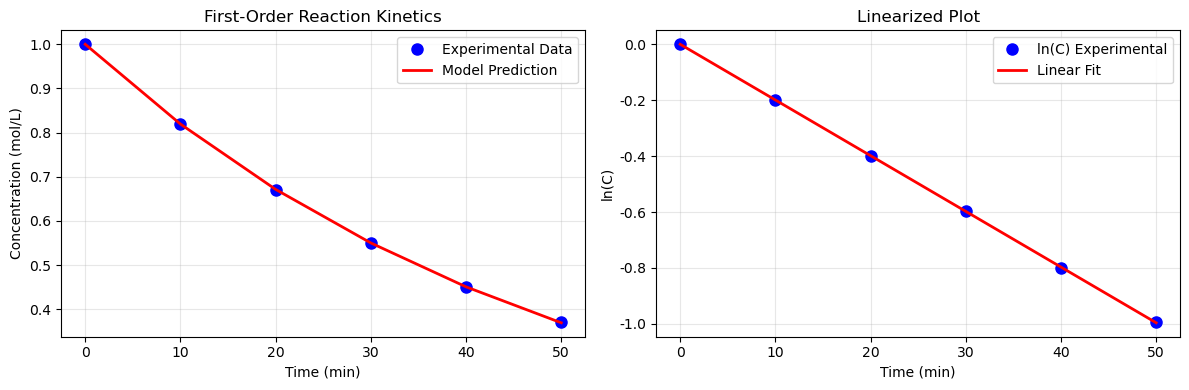

In [31]:
# 一階反應動力學：ln(C) = ln(C0) - k*t
time = np.array([0, 10, 20, 30, 40, 50])  # 時間 (min)
concentration = np.array([1.0, 0.82, 0.67, 0.55, 0.45, 0.37])  # 濃度 (mol/L)

# 線性化處理
ln_C = np.log(concentration)
ln_C0 = ln_C[0]

# 使用最小平方法估算斜率（-k）
k = -np.sum(time * ln_C) / np.sum(time ** 2)
half_life = np.log(2) / k

print("反應動力學參數估算")
print("=" * 50)
print(f"反應速率常數 k: {k:.6f} min⁻¹")
print(f"半生期 t₁/₂: {half_life:.2f} min")

# 計算預測值與誤差
ln_C_pred = ln_C0 - k * time
C_pred = np.exp(ln_C_pred)
error = concentration - C_pred
mse = np.mean(error ** 2)

print(f"\n模型評估:")
print(f"均方誤差 (MSE): {mse:.6f}")

# 視覺化
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(time, concentration, 'bo', label='Experimental Data', markersize=8)
plt.plot(time, C_pred, 'r-', label='Model Prediction', linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol/L)')
plt.title('First-Order Reaction Kinetics')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(time, ln_C, 'bo', label='ln(C) Experimental', markersize=8)
plt.plot(time, ln_C_pred, 'r-', label='Linear Fit', linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('ln(C)')
plt.title('Linearized Plot')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 質量平衡計算 (CSTR 串聯)

CSTR 串聯質量平衡計算
進料濃度: 10.00 mol/L
反應器 1 出口濃度: 5.00 mol/L
反應器 2 出口濃度: 2.50 mol/L
反應器 3 出口濃度: 1.25 mol/L

總轉化率: 87.50%


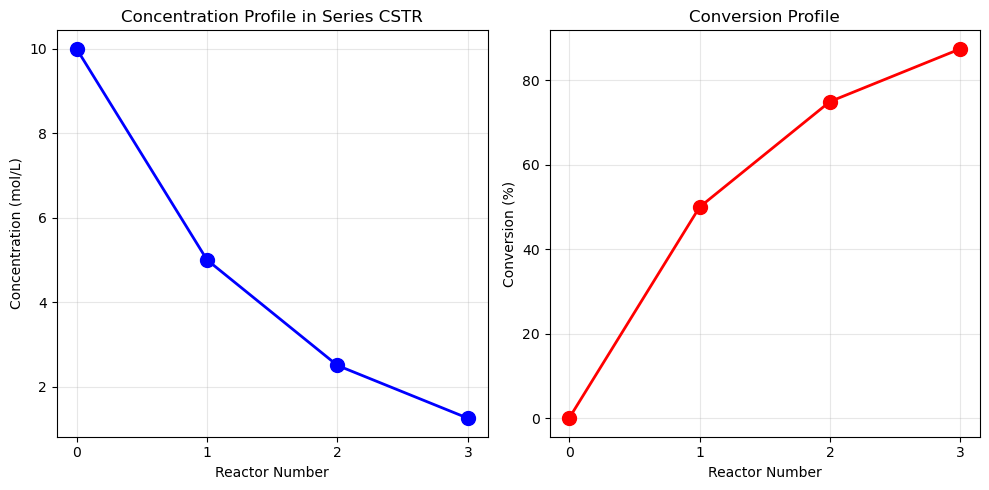

In [32]:
# 連續攪拌槽反應器 (CSTR) 質量平衡
C_in = 10.0      # 進料濃度 (mol/L)
k = 0.5          # 反應速率常數 (1/min)
tau = 2.0        # 滯留時間 (min)
n_reactors = 3   # 反應器數量

# 初始化濃度陣列
C = np.zeros(n_reactors + 1)
C[0] = C_in

# 計算每個反應器的出口濃度
for i in range(n_reactors):
    C[i+1] = C[i] / (1 + k * tau)

# 計算總轉化率
conversion = (C[0] - C[-1]) / C[0] * 100

print("CSTR 串聯質量平衡計算")
print("=" * 50)
print(f"進料濃度: {C[0]:.2f} mol/L")
for i in range(n_reactors):
    print(f"反應器 {i+1} 出口濃度: {C[i+1]:.2f} mol/L")
print(f"\n總轉化率: {conversion:.2f}%")

# 視覺化濃度變化
reactor_positions = np.arange(n_reactors + 1)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(reactor_positions, C, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Reactor Number')
plt.ylabel('Concentration (mol/L)')
plt.title('Concentration Profile in Series CSTR')
plt.grid(True, alpha=0.3)
plt.xticks(reactor_positions)

plt.subplot(1, 2, 2)
conversion_profile = (C[0] - C) / C[0] * 100
plt.plot(reactor_positions, conversion_profile, 'ro-', linewidth=2, markersize=10)
plt.xlabel('Reactor Number')
plt.ylabel('Conversion (%)')
plt.title('Conversion Profile')
plt.grid(True, alpha=0.3)
plt.xticks(reactor_positions)

plt.tight_layout()
plt.show()

### 6.3 效能比較：向量化 vs 迴圈

效能比較：計算平方
資料量: 1,000,000 個元素

明確迴圈時間: 0.2014 秒
向量化運算時間: 0.002001 秒

加速比: 100.7x

結論: 向量化運算比明確迴圈快 101 倍！


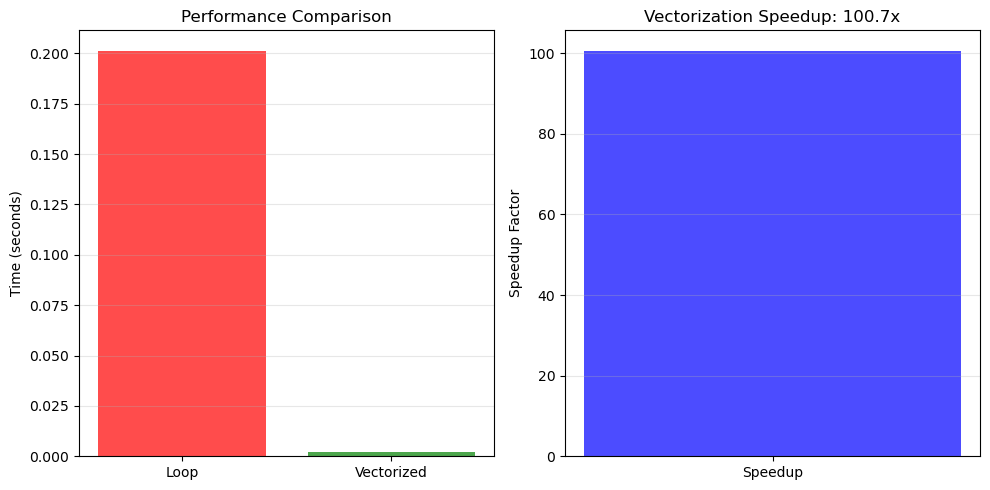

In [35]:
# 效能比較：向量化 vs 明確迴圈
n = 1000000
arr = np.arange(n)

# 使用迴圈（慢）
start = time.time()
result_loop = []
for x in arr:
    result_loop.append(x ** 2)
time_loop = time.time() - start

# 使用向量化（快）
start = time.time()
result_vectorized = arr ** 2
time_vectorized = time.time() - start

print("效能比較：計算平方")
print("=" * 50)
print(f"資料量: {n:,} 個元素")
print(f"\n明確迴圈時間: {time_loop:.4f} 秒")
print(f"向量化運算時間: {time_vectorized:.6f} 秒")
print(f"\n加速比: {time_loop / time_vectorized:.1f}x")
print(f"\n結論: 向量化運算比明確迴圈快 {time_loop / time_vectorized:.0f} 倍！")

# 視覺化
methods = ['Loop', 'Vectorized']
times = [time_loop, time_vectorized]
colors = ['red', 'green']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(methods, times, color=colors, alpha=0.7)
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison')
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
speedup = time_loop / time_vectorized
plt.bar(['Speedup'], [speedup], color='blue', alpha=0.7)
plt.ylabel('Speedup Factor')
plt.title(f'Vectorization Speedup: {speedup:.1f}x')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---
## 7. 總結

本 Notebook 介紹了 NumPy 的核心概念與應用：

### 核心概念
1. **陣列特性**：同質性、高效能、固定大小
2. **建立陣列**：從 list、內建函式、隨機數生成
3. **陣列操作**：索引、切片、布林索引、變形
4. **運算**：向量化運算、數學函式、統計分析
5. **化工應用**：反應動力學、質量平衡、效能優化

### 關鍵技巧
- ✓ 優先使用向量化運算，避免明確迴圈
- ✓ 善用廣播機制處理不同形狀的陣列
- ✓ 理解 view 與 copy 的差異
- ✓ 選擇適當的資料型態節省記憶體

### 下一步
完成本單元後，建議繼續學習：
- **Pandas**：建立在 NumPy 之上的資料處理套件
- **Matplotlib**：資料視覺化
- **SciPy**：科學計算與工程應用

**恭喜您完成 Unit03 NumPy 數值計算基礎！**